# ANN Project - Image Classifier for Clothing App

*   2301931251 - Daffa Rizki Rizaly 
* 2301937293 - Edbert Khovey 
* 2301869840 - William Yulio

## Import Library

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import itertools  
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

## Read Dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Explore the dataset

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

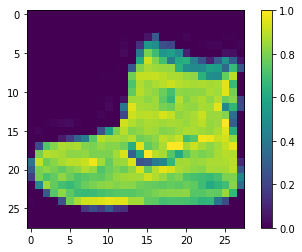

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
classes = {0: 'T-shirt/top', 
           1: 'Trouser', 
           2: 'Pullover', 
           3: 'Dress', 
           4: 'Coat',
           5: 'Sandal', 
           6: 'Shirt', 
           7: 'Sneaker', 
           8: 'Bag', 
           9: 'Ankle boot'}

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                       'Sandal','Shirt','Sneaker','Bag','Ankle boot']

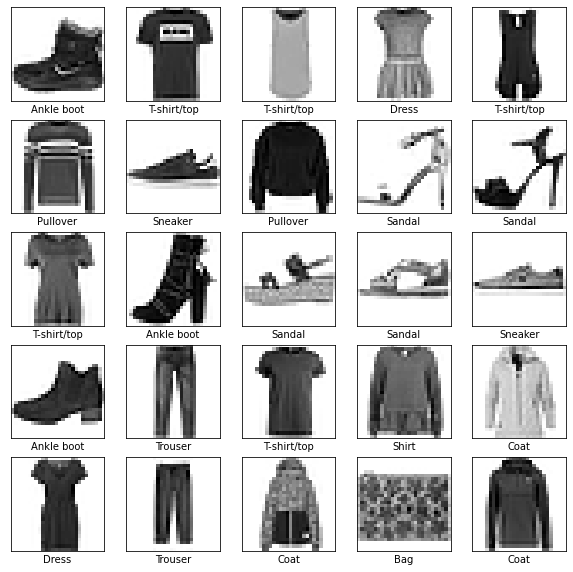

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Split Dataset for Validate

In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [ ]:
image_rows = 28
image_cols = 28
input_shape = (image_rows, image_cols, 1)

X_train = X_train.reshape(X_train.shape[0], image_rows, image_cols, 1)
X_test = x_test.reshape(x_test.shape[0], image_rows, image_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], image_rows, image_cols, 1)

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))
print('x_validate shape: {}'.format(X_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [ ]:
# One-hot encoding
y_train = to_categorical(y_train, 10)
y_validate = to_categorical(y_validate, 10)
y_test = to_categorical(y_test, 10)

## **Build the model**

##CNN - 1 Convolution layer


In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#ada 32 filter, dengan 1 filternya berukuran 3*3, karena 3*3 bisa menangkap detail image yang lebih bagus dibanding 5*5, dan keperluan nkomputasi 3*3 lebih kecill dibanding 5*5. memilih relu sebagai activation function karena relu adalah default nya.

cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
#pooling mengurangi dimensionality dari featured map tapi tetap mempertahankan informasi yang ada di dalamnya, pooling digunakan untuk mempercepat prose training, dan menghindari overfit.

cnn_model.add(Dropout(0.25))
#dropout untuk randomly shutdown neuron because kalau neuron udah kebanyakan biasnya itu isinya mirip atau bahakan sama, jadinya dengan randomly shutdown neuron, kita bisa percepat learning dan hemat computer power.

cnn_model.add(Flatten()) 
#flatten adalah proses untuk mengubah data dari 2d array ke vector.

cnn_model.add(Dense(128, activation='relu'))
#dense = fully connected layer, fully connected layer mempunyai arti bahwa neuron di layer sebelumnya itu terhubung dengan neuron di layer selanjutnya. 

cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(10, activation='softmax'))
#softmax function biasanya digunakan di output layer di clustering algorithm, karena softmax ini merubah raw value menjadi sesuatu yang pasti. jumlah dari output probabilities di fully connected layer itu selalu 1.

In [ ]:
cnn_model.compile(optimizer= Adam(lr= 0.0001), # menggunakan adam karena adam paling cepat dan paling bagus
          loss='categorical_crossentropy',#categorical cross entropy mengukur performance dari model berdasarkan output yang berada di anta 0 dan 1. loss bertambah jika predicted probability melenceng dari label
          metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
#fitting train data dengan validate, untuk menghindari overfit
history = cnn_model.fit(X_train, y_train,
          batch_size=300,
          epochs=75,
          verbose=1,
          validation_data=(X_validate, y_validate))

Epoch 1/75
160/160 [==============================] - 32s 7ms/step - loss: 1.1479 - accuracy: 0.6344 - val_loss: 0.6513 - val_accuracy: 0.7912
Epoch 2/75
160/160 [==============================] - 1s 6ms/step - loss: 0.6226 - accuracy: 0.7837 - val_loss: 0.5219 - val_accuracy: 0.8222
Epoch 3/75
160/160 [==============================] - 1s 6ms/step - loss: 0.5358 - accuracy: 0.8122 - val_loss: 0.4705 - val_accuracy: 0.8384
Epoch 4/75
160/160 [==============================] - 1s 6ms/step - loss: 0.4843 - accuracy: 0.8329 - val_loss: 0.4337 - val_accuracy: 0.8513
Epoch 5/75
160/160 [==============================] - 1s 6ms/step - loss: 0.4575 - accuracy: 0.8403 - val_loss: 0.4128 - val_accuracy: 0.8558
Epoch 6/75
160/160 [==============================] - 1s 6ms/step - loss: 0.4355 - accuracy: 0.8473 - val_loss: 0.3964 - val_accuracy: 0.8597
Epoch 7/75
160/160 [==============================] - 1s 6ms/step - loss: 0.4151 - accuracy: 0.8556 - val_loss: 0.3783 - val_accuracy: 0.8683
Epoch

In [ ]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.24338337779045105
Test accuracy: 91.17000102996826


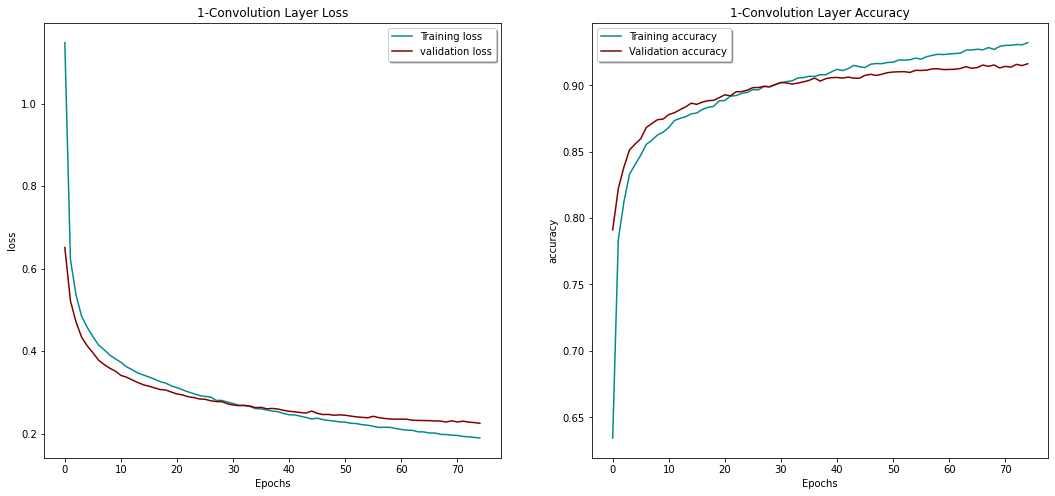

In [ ]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('1-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('1-Convolution Layer Accuracy')
plt.show()

## CNN - 2 Convolution layer


In [ ]:
cnn_model_2 = Sequential()

cnn_model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#ada 32 filter, dengan 1 filternya berukuran 3*3, karena 3*3 bisa menangkap detail image yang lebih bagus dibanding 5*5, dan keperluan nkomputasi 3*3 lebih kecill dibanding 5*5. memilih relu sebagai activation function karena relu adalah default nya.

cnn_model_2.add(Dropout(0.2))
#dropout untuk randomly shutdown neuron because kalau neuron udah kebanyakan biasnya itu isinya mirip atau bahakan sama, jadinya dengan randomly shutdown neuron, kita bisa percepat learning dan hemat computer power.

cnn_model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#ada 64 filter, dengan 1 filternya berukuran 3*3, karena 3*3 bisa menangkap detail image yang lebih bagus dibanding 5*5, dan keperluan nkomputasi 3*3 lebih kecill dibanding 5*5. memilih relu sebagai activation function karena relu adalah default nya.
#karena namanya CNN 2 ya artinya jadi ada 2 layer cnn nya deh

cnn_model_2.add(MaxPooling2D(pool_size=(2, 2)))
#pooling mengurangi dimensionality dari featured map tapi tetap mempertahankan informasi yang ada di dalamnya, pooling digunakan untuk mempercepat prose training, dan menghindari overfit.


cnn_model_2.add(Dropout(0.3))
cnn_model_2.add(Flatten())
#flatten adalah proses untuk mengubah data dari 2d array ke vector.


cnn_model_2.add(Dense(64, activation='relu'))
#dense = fully connected layer, fully connected layer mempunyai arti bahwa neuron di layer sebelumnya itu terhubung dengan neuron di layer selanjutnya. 
cnn_model_2.add(Dense(128, activation='relu'))
#dense ada 2 karena namanya CNN 2layer jadinya ada 2 layer ya dense nya harus ditambahin juga

cnn_model_2.add(Dense(10, activation='softmax'))
#softmax function biasanya digunakan di output layer di clustering algorithm, karena softmax ini merubah raw value menjadi sesuatu yang pasti. jumlah dari output probabilities di fully connected layer itu selalu 1.

In [ ]:
cnn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
cnn_model_2.compile(optimizer= Adam(lr= 0.0001),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history_2 = cnn_model_2.fit(X_train, y_train,
          batch_size= 300,
          epochs=75,
          verbose=1,
          validation_data=(X_validate, y_validate))

Epoch 1/75
160/160 [==============================] - 3s 16ms/step - loss: 1.1256 - accuracy: 0.6431 - val_loss: 0.6901 - val_accuracy: 0.7542
Epoch 2/75
160/160 [==============================] - 3s 16ms/step - loss: 0.5831 - accuracy: 0.7893 - val_loss: 0.5548 - val_accuracy: 0.7962
Epoch 3/75
160/160 [==============================] - 3s 16ms/step - loss: 0.5095 - accuracy: 0.8159 - val_loss: 0.4718 - val_accuracy: 0.8339
Epoch 4/75
160/160 [==============================] - 3s 16ms/step - loss: 0.4681 - accuracy: 0.8320 - val_loss: 0.4501 - val_accuracy: 0.8430
Epoch 5/75
160/160 [==============================] - 2s 15ms/step - loss: 0.4384 - accuracy: 0.8437 - val_loss: 0.4164 - val_accuracy: 0.8518
Epoch 6/75
160/160 [==============================] - 3s 17ms/step - loss: 0.4174 - accuracy: 0.8512 - val_loss: 0.3912 - val_accuracy: 0.8619
Epoch 7/75
160/160 [==============================] - 2s 15ms/step - loss: 0.4010 - accuracy: 0.8579 - val_loss: 0.3792 - val_accuracy: 0.8651

In [ ]:
score = cnn_model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.24826020002365112
Test accuracy: 91.57999753952026


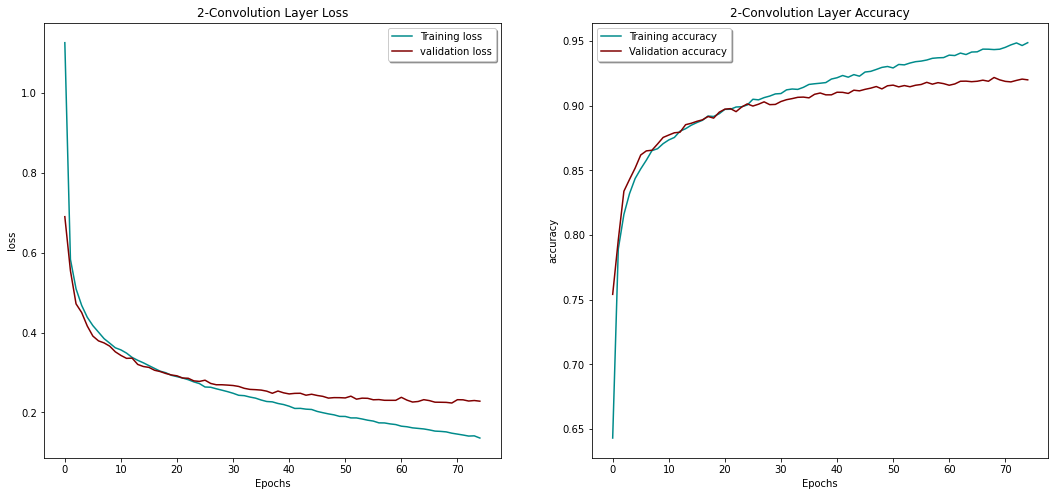

In [ ]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_2.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_2.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('2-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history_2.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history_2.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('2-Convolution Layer Accuracy')
plt.show()

## CNN - 3 Convolution layer


In [ ]:
cnn_model_3 = Sequential() #It allows us to create a deep learning model by adding layers to it. Here, every unit in a layer is connected to every unit in the previous layer. 

cnn_model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#ada 32 filter, dengan 1 filternya berukuran 3*3, karena 3*3 bisa menangkap detail image yang lebih bagus dibanding 5*5, dan keperluan nkomputasi 3*3 lebih kecill dibanding 5*5. memilih relu sebagai activation function karena relu adalah default nya.
cnn_model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#ada 64 filter, dengan 1 filternya berukuran 3*3, karena 3*3 bisa menangkap detail image yang lebih bagus dibanding 5*5, dan keperluan nkomputasi 3*3 lebih kecill dibanding 5*5. memilih relu sebagai activation function karena relu adalah default nya.
#karena namanya CNN 3 ya artinya jadi ada 3 layer cnn nya deh
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2)))
#pooling mengurangi dimensionality dari featured map tapi tetap mempertahankan informasi yang ada di dalamnya, pooling digunakan untuk mempercepat prose training, dan menghindari overfit.
cnn_model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#ada 128 filter, dengan 1 filternya berukuran 3*3, karena 3*3 bisa menangkap detail image yang lebih bagus dibanding 5*5, dan keperluan nkomputasi 3*3 lebih kecill dibanding 5*5. memilih relu sebagai activation function karena relu adalah default nya.
#karena namanya CNN 3 ya artinya jadi ada 3 layer cnn nya deh
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2)))
#pooling mengurangi dimensionality dari featured map tapi tetap mempertahankan informasi yang ada di dalamnya, pooling digunakan untuk mempercepat prose training, dan menghindari overfit.

cnn_model_3.add(Dropout(0.3))#dropout untuk randomly shutdown neuron because kalau neuron udah kebanyakan biasnya itu isinya mirip atau bahakan sama, jadinya denga randomly shutdown neuron, kita bisa percepat learning dan hemat computer resources
cnn_model_3.add(Flatten()) #flattening untuk bisa dimasukkan ke NN
#flatten adalah proses untuk mengubah data dari 2d array ke vector.

cnn_model_3.add(Dense(128, activation='relu'))
#dense = fully connected layer, fully connected layer mempunyai arti bahwa neuron di layer sebelumnya itu terhubung dengan neuron di layer selanjutnya. 

cnn_model_3.add(Dense(256, activation='relu'))
#dense = fully connected layer, fully connected layer mempunyai arti bahwa neuron di layer sebelumnya itu terhubung dengan neuron di layer selanjutnya. 

cnn_model_3.add(Dense(10, activation='softmax'))#softmax function is used to normalize the outputs, converting them from weighted sum values into probabilities that sum to one

In [ ]:
cnn_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)             

In [ ]:
cnn_model_3.compile(optimizer= Adam(lr= 0.0001),#adam optimizer emang yang paling prefferd because it is computationally efficient, and Adam works well in cases in large datasets and large parameter settings.
          loss='categorical_crossentropy', #Categorical crossentropy is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one.
          metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history_3 = cnn_model_3.fit(X_train, y_train,
                            batch_size=300,
                            epochs=75,
                            verbose=1, #hanya untuk visualisasi epoch
                            validation_data=(X_validate, y_validate))

Epoch 1/75
160/160 [==============================] - 4s 19ms/step - loss: 1.1942 - accuracy: 0.6072 - val_loss: 0.6425 - val_accuracy: 0.7579
Epoch 2/75
160/160 [==============================] - 3s 18ms/step - loss: 0.6007 - accuracy: 0.7706 - val_loss: 0.5304 - val_accuracy: 0.7974
Epoch 3/75
160/160 [==============================] - 3s 17ms/step - loss: 0.5184 - accuracy: 0.8065 - val_loss: 0.4695 - val_accuracy: 0.8324
Epoch 4/75
160/160 [==============================] - 3s 17ms/step - loss: 0.4704 - accuracy: 0.8276 - val_loss: 0.4335 - val_accuracy: 0.8436
Epoch 5/75
160/160 [==============================] - 3s 17ms/step - loss: 0.4368 - accuracy: 0.8412 - val_loss: 0.4026 - val_accuracy: 0.8573
Epoch 6/75
160/160 [==============================] - 3s 17ms/step - loss: 0.4092 - accuracy: 0.8526 - val_loss: 0.3847 - val_accuracy: 0.8615
Epoch 7/75
160/160 [==============================] - 3s 18ms/step - loss: 0.3907 - accuracy: 0.8586 - val_loss: 0.3623 - val_accuracy: 0.8682

In [ ]:
y_pred = cnn_model_3.predict_classes(X_test, verbose=0)
score = cnn_model_3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Test loss: 0.2327287644147873
Test accuracy: 91.94999933242798


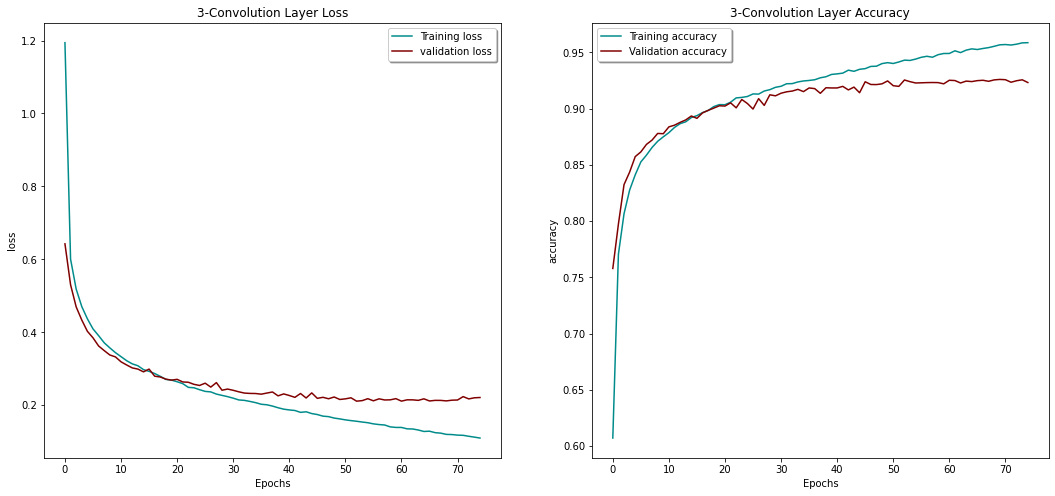

In [ ]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_3.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_3.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('3-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history_3.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history_3.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('3-Convolution Layer Accuracy')
plt.show()

## Evaluation Matrix

In [ ]:
    
    def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
        plt.figure(figsize = (8,8))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()


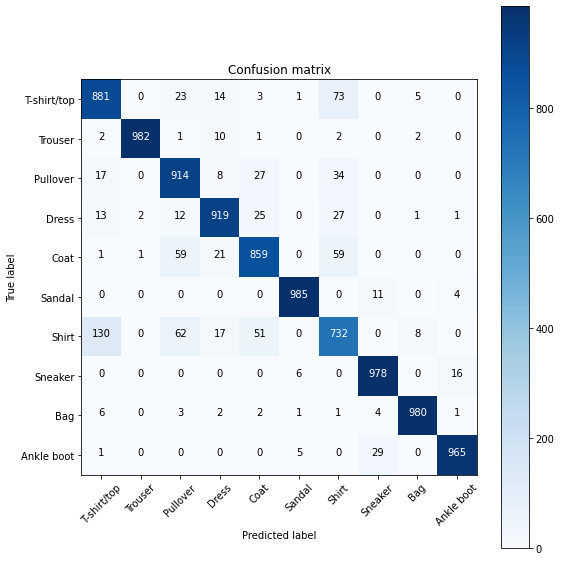

In [ ]:
Y_test_converted = np.argmax(y_test, axis=1)
cnf_matrix = confusion_matrix(Y_test_converted, y_pred)
plot_confusion_matrix(cnf_matrix, classes = class_names)

In [ ]:
print(classification_report(Y_test_converted, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.85      0.91      0.88      1000
           3       0.93      0.92      0.92      1000
           4       0.89      0.86      0.87      1000
           5       0.99      0.98      0.99      1000
           6       0.79      0.73      0.76      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

